# SMRTTECH 4AI3 - Project (Group 6)

### APS System Failure

### Team:
- Muizz Raja (400198557)
- Walid Alshareef (400208789)

#Import Libraries

In [ ]:
# Import required libraries
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from typing import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Data Visualization

In [ ]:
# Read the csv file into a pandas dataframe
df_train = pd.read_csv('aps_failure_training_set.csv', na_values="na")

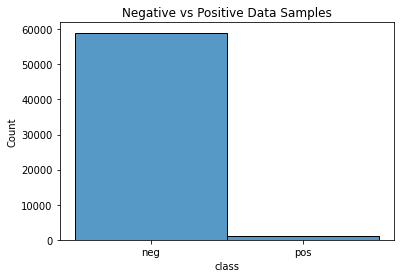

In [ ]:
# Visualize neg vs pos data
seaborn.histplot(data = df_train, x = 'class')
plt.title("Negative vs Positive Data Samples")
plt.show()

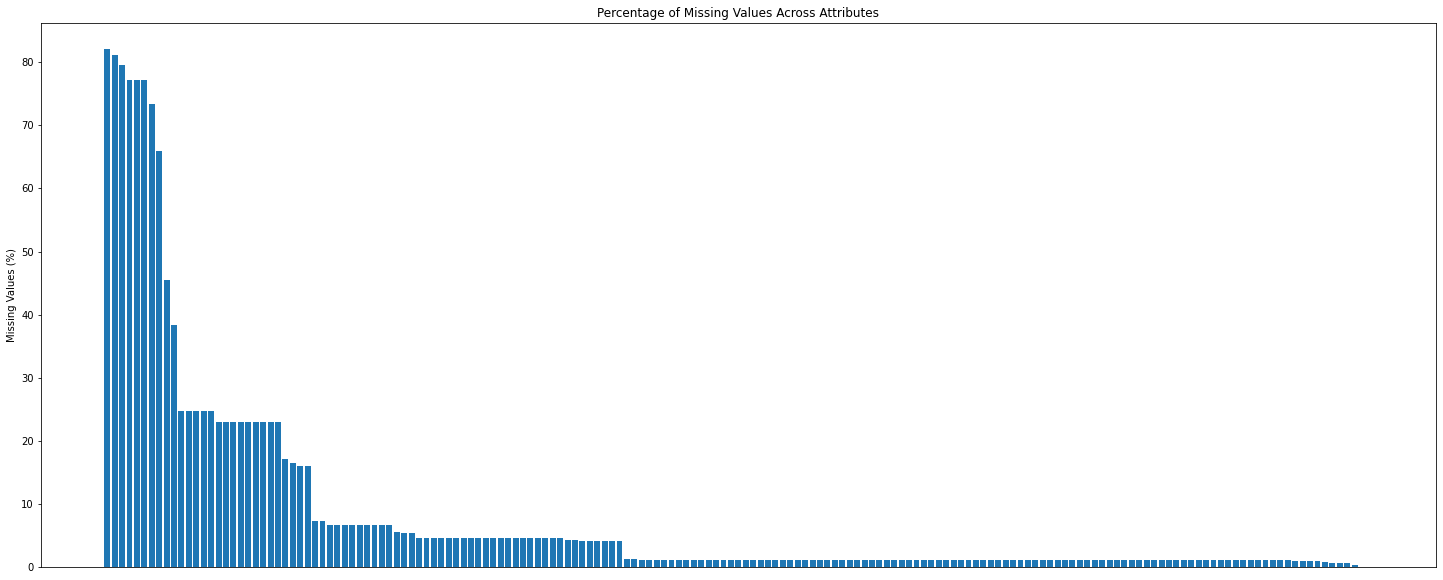

In [ ]:
# Visualize percentage of missing attributes by column
fig, ax = plt.subplots(figsize=(25,10))
null_data = df_train.isna().sum().div(df_train.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)
ax.bar(null_data.index, null_data.values.T[0])
plt.xticks([])
plt.ylabel("Missing Values (%)")
plt.title("Percentage of Missing Values Across Attributes")
plt.show()

# Data Pre-Processing

In [ ]:
# Assign neg and pos to 0 and 1 for easier classification
df_train['class'] = (df_train['class'] == 'pos').astype(int)

In [ ]:
# Identify columns with over 50% data missing and drop them
missing_values = ((df_train.isna().sum())/df_train.shape[0]).sort_values(ascending=False)
above_50 = list(missing_values[missing_values > 0.5].index)
new_train = df_train.drop(columns=above_50)
new_train.shape

(60000, 163)

In [ ]:
# Medain impute columns with below 50% data missing 
impute = lambda series: series.fillna(series.median())
new_train = new_train.transform(impute)

In [ ]:
# Seperate features and class labels
x_train = new_train.drop('class',axis=1)
y_train = new_train['class']

In [ ]:
# Normalize the data to bring into a similar range
scaler = MinMaxScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)

In [ ]:
# Feature selection using lasso logisitic regression
model = LogisticRegression(penalty='l1', solver='saga', max_iter=10000)
model.fit(x_scaled, y_train)
model.coef_

array([[  8.89006271,  -0.96568392,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   2.0995121 ,
         20.37043871,   0.        ,   0.        ,   0.        ,
         -3.17695404,   0.        ,   0.        ,   0.        ,
          0.        ,  -0.58419261,   0.        ,   1.94037681,
          0.        ,   2.73040069,   1.17769381,   0.        ,
          7.14191924,   1.6600671 ,   0.        ,   2.71481356,
          0.38092592,   0.        ,   0.        ,   8.62076655,
          0.8960666 ,   0.55417366,   4.64043011,   0.        ,
          3.56647826,  -2.68421191,  -3.68977265,   6.14256855,
          0.        ,   0.        ,   0.        ,   0.        ,
          2.76161459,   0.        ,   0.        ,   0.        ,
          5.1314309 ,   0.        ,   0.        ,   0.        ,
         -3.93026709,   0.        ,   0.        ,   0.        ,
          0.        ,  -1.15463866,  -0.18191258,   0.        ,
          0.        ,   0.        ,   0.

In [ ]:
# Measure the score of the feature selection model
score = model.score(x_scaled, y_train)
print(f"The model has a performance of {score} on the training set.")

The model has a performance of 0.9910333333333333 on the training set.


In [ ]:
# Select the useful features
selected_features = x_scaled.columns[model.coef_[0] != 0]
x_selected = x_scaled[selected_features]
x_selected.shape

(60000, 74)

In [ ]:
# Deal with imbalanced dataset
oversample = SMOTE(sampling_strategy = 0.25)
X, Y = oversample.fit_resample(x_selected, y_train)
counter = Counter(Y)
print(counter)

Counter({0: 59000, 1: 14750})


# Test Data Handling



In [ ]:
# Read the csv file into a pandas dataframe
df_test = pd.read_csv('aps_failure_test_set.csv', na_values="na")

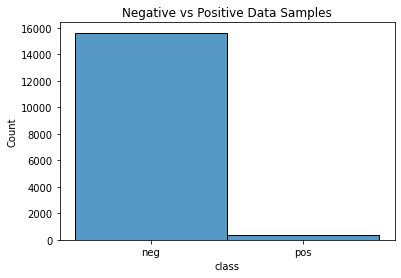

In [ ]:
# Visualize neg vs pos data
seaborn.histplot(data = df_test, x = 'class')
plt.title("Negative vs Positive Data Samples")
plt.show()

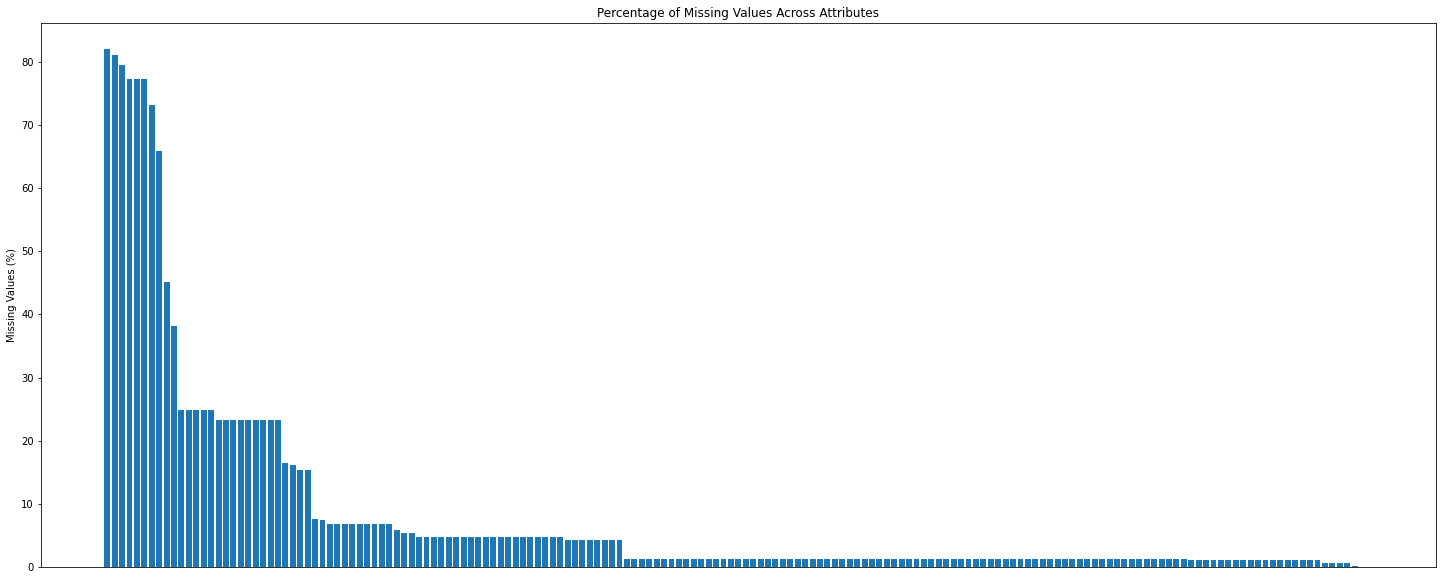

In [ ]:
# Visualize percentage of missing attributes by column
fig, ax = plt.subplots(figsize=(25,10))
null_data_test = df_test.isna().sum().div(df_test.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)
ax.bar(null_data_test.index, null_data_test.values.T[0])
plt.xticks([])
plt.ylabel("Missing Values (%)")
plt.title("Percentage of Missing Values Across Attributes")
plt.show()

In [ ]:
# Assign neg and pos to 0 and 1 for easier classification
df_test['class'] = (df_test['class'] == 'pos').astype(int)

In [ ]:
# Identify columns with over 50% data missing and drop them
missing_values_test = ((df_test.isna().sum())/df_test.shape[0]).sort_values(ascending=False)
above_50_test = list(missing_values_test[missing_values_test > 0.5].index)
new_test = df_test.drop(columns=above_50_test)
new_test.shape

(16000, 163)

In [ ]:
# Medain impute columns with below 50% data missing using the train set median
new_test = new_test.transform(impute)

In [ ]:
# Seperate features and class labels
x_test = new_test.drop('class',axis=1)
y_test = new_test['class']

In [ ]:
# Normalize the data to bring into a similar range using normal transform
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

In [ ]:
# Testing the strength of features selected and resampling of underrepresented data on test data
x_test_selected = x_test_scaled[selected_features]
test_model = LogisticRegression(max_iter=10000)
test_model.fit(X, Y)
score = test_model.score(x_test_selected, y_test)
print(f"Our model had a performance of {score} on the test set.")

Our model had a performance of 0.984375 on the test set.


In [ ]:
# Deal with imbalanced dataset
oversample = SMOTE(sampling_strategy = 0.25)
Xt, Yt = oversample.fit_resample(x_test_selected, y_test)
countert = Counter(Yt)
print(countert)

Counter({0: 15625, 1: 3906})


#Model

Model 1: Logistic Regression

In [ ]:
model1 = LogisticRegression(solver='liblinear')
model1.fit(X, Y)

LogisticRegression(solver='liblinear')

In [ ]:
predictions1 = model1.predict(Xt)
predictions1

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
percentage = model1.score(Xt, Yt)
percentage

0.9640571399313911

Model 2: Random Forest Classifier

In [ ]:
model2 = RandomForestClassifier(max_depth=5, random_state=10)
model2.fit(X, Y)

RandomForestClassifier(max_depth=5, random_state=10)

In [ ]:
predictions2 = model2.predict(Xt)
predictions2

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
percentage = model2.score(Xt, Yt)
percentage

0.9676411858071783

Model 3: KNeighbours

In [ ]:
model3 = KNeighborsClassifier(n_neighbors=8)
model3.fit(X, Y)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
predictions3 = model3.predict(Xt)
predictions3

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
percentage = model3.score(Xt, Yt)
percentage

0.9388664174901439

#Hyper-Parameter Tuning

Model 1 parameter tuning and results

In [ ]:
params = {'C': 10**np.linspace(-5, 5, 11)}
clf = GridSearchCV(model1, params, n_jobs=-1, verbose=1)
clf.fit(X, Y)
bs = clf.best_score_
bp = clf.best_params_
be = clf.best_estimator_
predictions_hyper = be.predict(Xt)
print(f"The best model had the following parameters {bp} with this corresponding score {bs}")
tn, fp, fn, tp = confusion_matrix(Yt, predictions_hyper).ravel()
tpr = tp/(tp + fn)
tnr = tn/(tn + fp)
print(f"Our model performs with an accuracy of {tpr} on the positive class and {tnr} on the negative class.")

Fitting 5 folds for each of 11 candidates, totalling 55 fits
The best model had the following parameters {'C': 10000.0} with this corresponding score 0.967877966101695
Our model performs with an accuracy of 0.8817204301075269 on the positive class and 0.988224 on the negative class.


Model 2 parameter tuning and results

In [ ]:
params = {'min_samples_split': [2, 4, 6, 8, 10], 
          'min_samples_leaf': [1, 2, 3, 4, 5]}
clf = GridSearchCV(model2, params, n_jobs=-1, verbose=1)
clf.fit(X, Y)
bs = clf.best_score_
bp = clf.best_params_
be = clf.best_estimator_
predictions_hyper = be.predict(Xt)
print(f"The best model had the following parameters {bp} with this corresponding score {bs}")
tn, fp, fn, tp = confusion_matrix(Yt, predictions_hyper).ravel()
tpr = tp/(tp + fn)
tnr = tn/(tn + fp)
print(f"Our model performs with an accuracy of {tpr} on the positive class and {tnr} on the negative class.")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
The best model had the following parameters {'min_samples_leaf': 1, 'min_samples_split': 6} with this corresponding score 0.9654237288135594
Our model performs with an accuracy of 0.9467485919098823 on the positive class and 0.973056 on the negative class.


Model 3 parameter tuning and results

In [ ]:
params = {'n_neighbors': [5, 10, 15, 20, 25]}
clf = GridSearchCV(model3, params, n_jobs=-1, verbose=1)
clf.fit(X, Y)
bs = clf.best_score_
bp = clf.best_params_
be = clf.best_estimator_
predictions_hyper = be.predict(Xt)
print(f"The best model had the following parameters {bp} with this corresponding score {bs}")
tn, fp, fn, tp = confusion_matrix(Yt, predictions_hyper).ravel()
tpr = tp/(tp + fn)
tnr = tn/(tn + fp)
print(f"Our model performs with an accuracy of {tpr} on the positive class and {tnr} on the negative class.")

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


The best model had the following parameters {'n_neighbors': 5} with this corresponding score 0.9840406779661016
Our model performs with an accuracy of 0.8653353814644137 on the positive class and 0.984384 on the negative class.


# References

datark1. (2021, June 6). Scania APS failures - A pipeline with PCA and ML. Kaggle. Retrieved
November 10, 2022, from
https://www.kaggle.com/code/datark1/scania-aps-failures-a-pipeline-with-pca-and-ml

Kavish111. (2022, May 30). Handling imbalanced data with imbalance-learn in Python. Analytics Vidhya. Retrieved November 29, 2022, from https://www.analyticsvidhya.com/blog/2022/05/handling-imbalanced-data-with-imbalance-learn-in-python/ 

Shetty, R. (2021, January 2). Predicting a failure in Scania’s air pressure system (APS).
Predicting a Failure in Scania’s Air Pressure System. Retrieved November 10, 2022, from
https://towardsdatascience.com/predicting-a-failure-in-scanias-air-pressure-system-aps-c260bcc4
d038

Sklearn.linear_model.logisticregression. scikit. (n.d.). Retrieved November 29, 2022, from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html 

Sklearn.ensemble.randomforestclassifier. scikit. (n.d.). Retrieved November 29, 2022, from https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 

Sklearn.neighbors.kneighborsclassifier. scikit. (n.d.). Retrieved November 29, 2022, from https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html 

Sklearn.model_selection.GRIDSEARCHCV. scikit. (n.d.). Retrieved December 6, 2022, from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html# 

Smote#. SMOTE - Version 0.9.1. (n.d.). Retrieved December 4, 2022, from https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html 